In [2]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
%matplotlib inline
from fetch_request import download

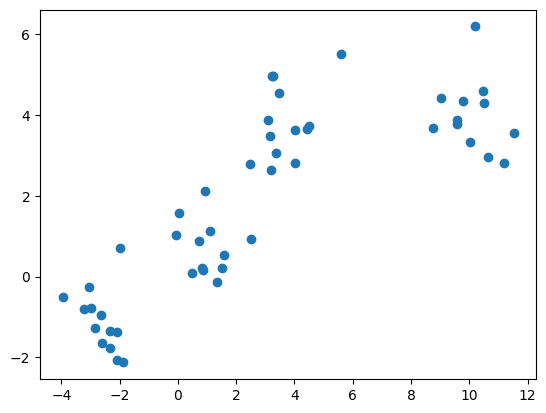

In [3]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

In [4]:
agglom = AgglomerativeClustering(n_clusters=4, linkage='average')
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

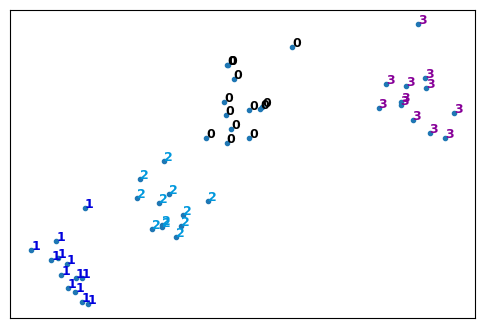

In [6]:
# scaling
plt.figure(figsize=(6,4))

x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)
for i in range(X1.shape[0]):
    # label each data point with group
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
    # cycle through colors
    color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
    fontdict={'weight': 'bold', 'size': 9})

plt.scatter(X1[:, 0], X1[:, 1], marker='.')

# hide x and y ticks
plt.xticks([])
plt.yticks([])

plt.show()

### Dendrogram

[[ 0.         12.28299255 11.15797249 ... 12.98939528  5.542139
   6.36588519]
 [12.28299255  0.          1.29705342 ...  1.07530816  6.84015456
   6.01483377]
 [11.15797249  1.29705342  0.         ...  1.83466065  5.65612217
   4.82527709]
 ...
 [12.98939528  1.07530816  1.83466065 ...  0.          7.47560134
   6.64446845]
 [ 5.542139    6.84015456  5.65612217 ...  7.47560134  0.
   0.83117976]
 [ 6.36588519  6.01483377  4.82527709 ...  6.64446845  0.83117976
   0.        ]]


C:\Users\Diego\AppData\Local\Temp\ipykernel_2700\4000989398.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


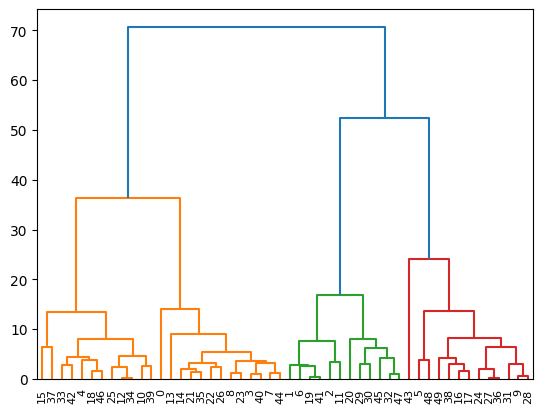

In [8]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)
Z = hierarchy.linkage(dist_matrix, 'complete')
dendro = hierarchy.dendrogram(Z)

C:\Users\Diego\AppData\Local\Temp\ipykernel_2700\1799906472.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_2 = hierarchy.linkage(dist_matrix, 'average')


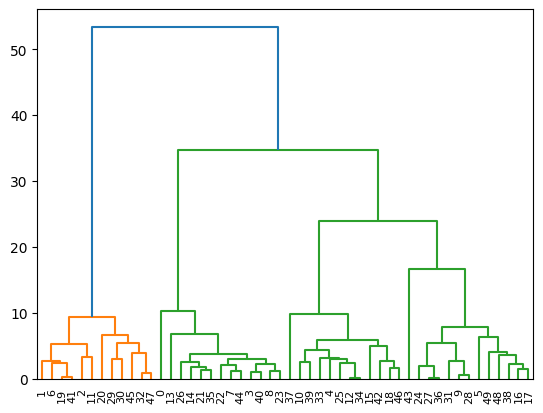

In [9]:
Z_2 = hierarchy.linkage(dist_matrix, 'average')
dendro_2 = hierarchy.dendrogram(Z_2)

In [10]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/cars_clus.csv"
await download(path, "cars_clus.csv")

In [50]:
df = pd.read_csv("data/cars_clus.csv")
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


#### Cleaning

In [47]:
df.iloc[:, 2:-2]

,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000
1,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000
2,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000
3,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000
4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000
...,...,...,...,...,...,...,...,...,...,...,...,...
154,17.531,$null$,0.000,28.800,2.400,168.000,104.900,69.300,186.200,3.259,17.900,25.000
155,3.493,$null$,0.000,45.500,2.300,236.000,104.900,71.500,185.700,3.601,18.500,23.000
156,18.969,$null$,0.000,36.000,2.900,201.000,109.900,72.100,189.800,3.600,21.100,24.000
157,$null$,$null$,$null$,21.500,1.500,76.000,106.300,67.900,175.000,2.932,11.900,46.000


In [51]:
print("Original data shape: ", df.shape)
df[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df = df.reset_index(drop=True)
print("Cleaned data shape: ", df.shape)
df.head()

Original data shape:  (159, 16)
Cleaned data shape:  (117, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [52]:
cdf = df[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

#### Normalization

In [56]:
from sklearn.preprocessing import MinMaxScaler

x = cdf.values
min_max = MinMaxScaler()
matrix = min_max.fit_transform(x)
matrix[0:3]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333]])

In [63]:
import scipy

leng = matrix.shape[0]
D = np.zeros([leng,leng])
# Go through the matrix and evaluate the distance between each pair of rows
for i in range(leng):
    for j in range(leng):
        D[i, j] = scipy.spatial.distance.euclidean(matrix[i], matrix[j])
print(D[:3])

Z = hierarchy.linkage(D, 'complete')

[[0.         0.57777143 0.75455727 0.2128736  0.77290095 1.04388755
  0.36842756 0.56119503 0.60285234 0.7247098  0.89001868 0.75843206
  1.02153513 0.96535724 0.63567563 0.17071078 0.40323491 0.61853796
  0.63420586 0.6754556  0.93915518 0.21397175 0.80969062 0.37590216
  0.44135804 0.789647   0.360225   0.86544357 0.43833127 0.35062872
  0.41233945 1.39719208 1.65751061 1.36554648 1.51566212 1.07292701
  0.79233821 0.13903196 0.54835405 0.29241045 0.6088358  1.11985701
  0.7983668  1.0894434  1.40878766 0.66400653 1.57974136 0.20393746
  0.3770946  0.27656925 0.69702407 1.00353778 0.26967695 0.08283378
  0.4222794  0.5740503  0.58142148 0.57784373 0.76458229 0.54793816
  0.65334392 0.92651776 0.98116752 1.18919833 0.17306181 0.24453155
  0.31160876 0.62953169 0.56068485 0.93464515 0.53842915 0.25073154
  0.29894151 0.62564242 1.12541546 0.80911734 0.84899573 0.30931775
  0.71054685 1.09912459 0.92594211 0.10695182 0.28783805 0.54552004
  0.85652232 0.73212018 0.41719967 0.94583964 0.

C:\Users\Diego\AppData\Local\Temp\ipykernel_2700\501624520.py:11: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


In [72]:
from scipy.cluster.hierarchy import fcluster

max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

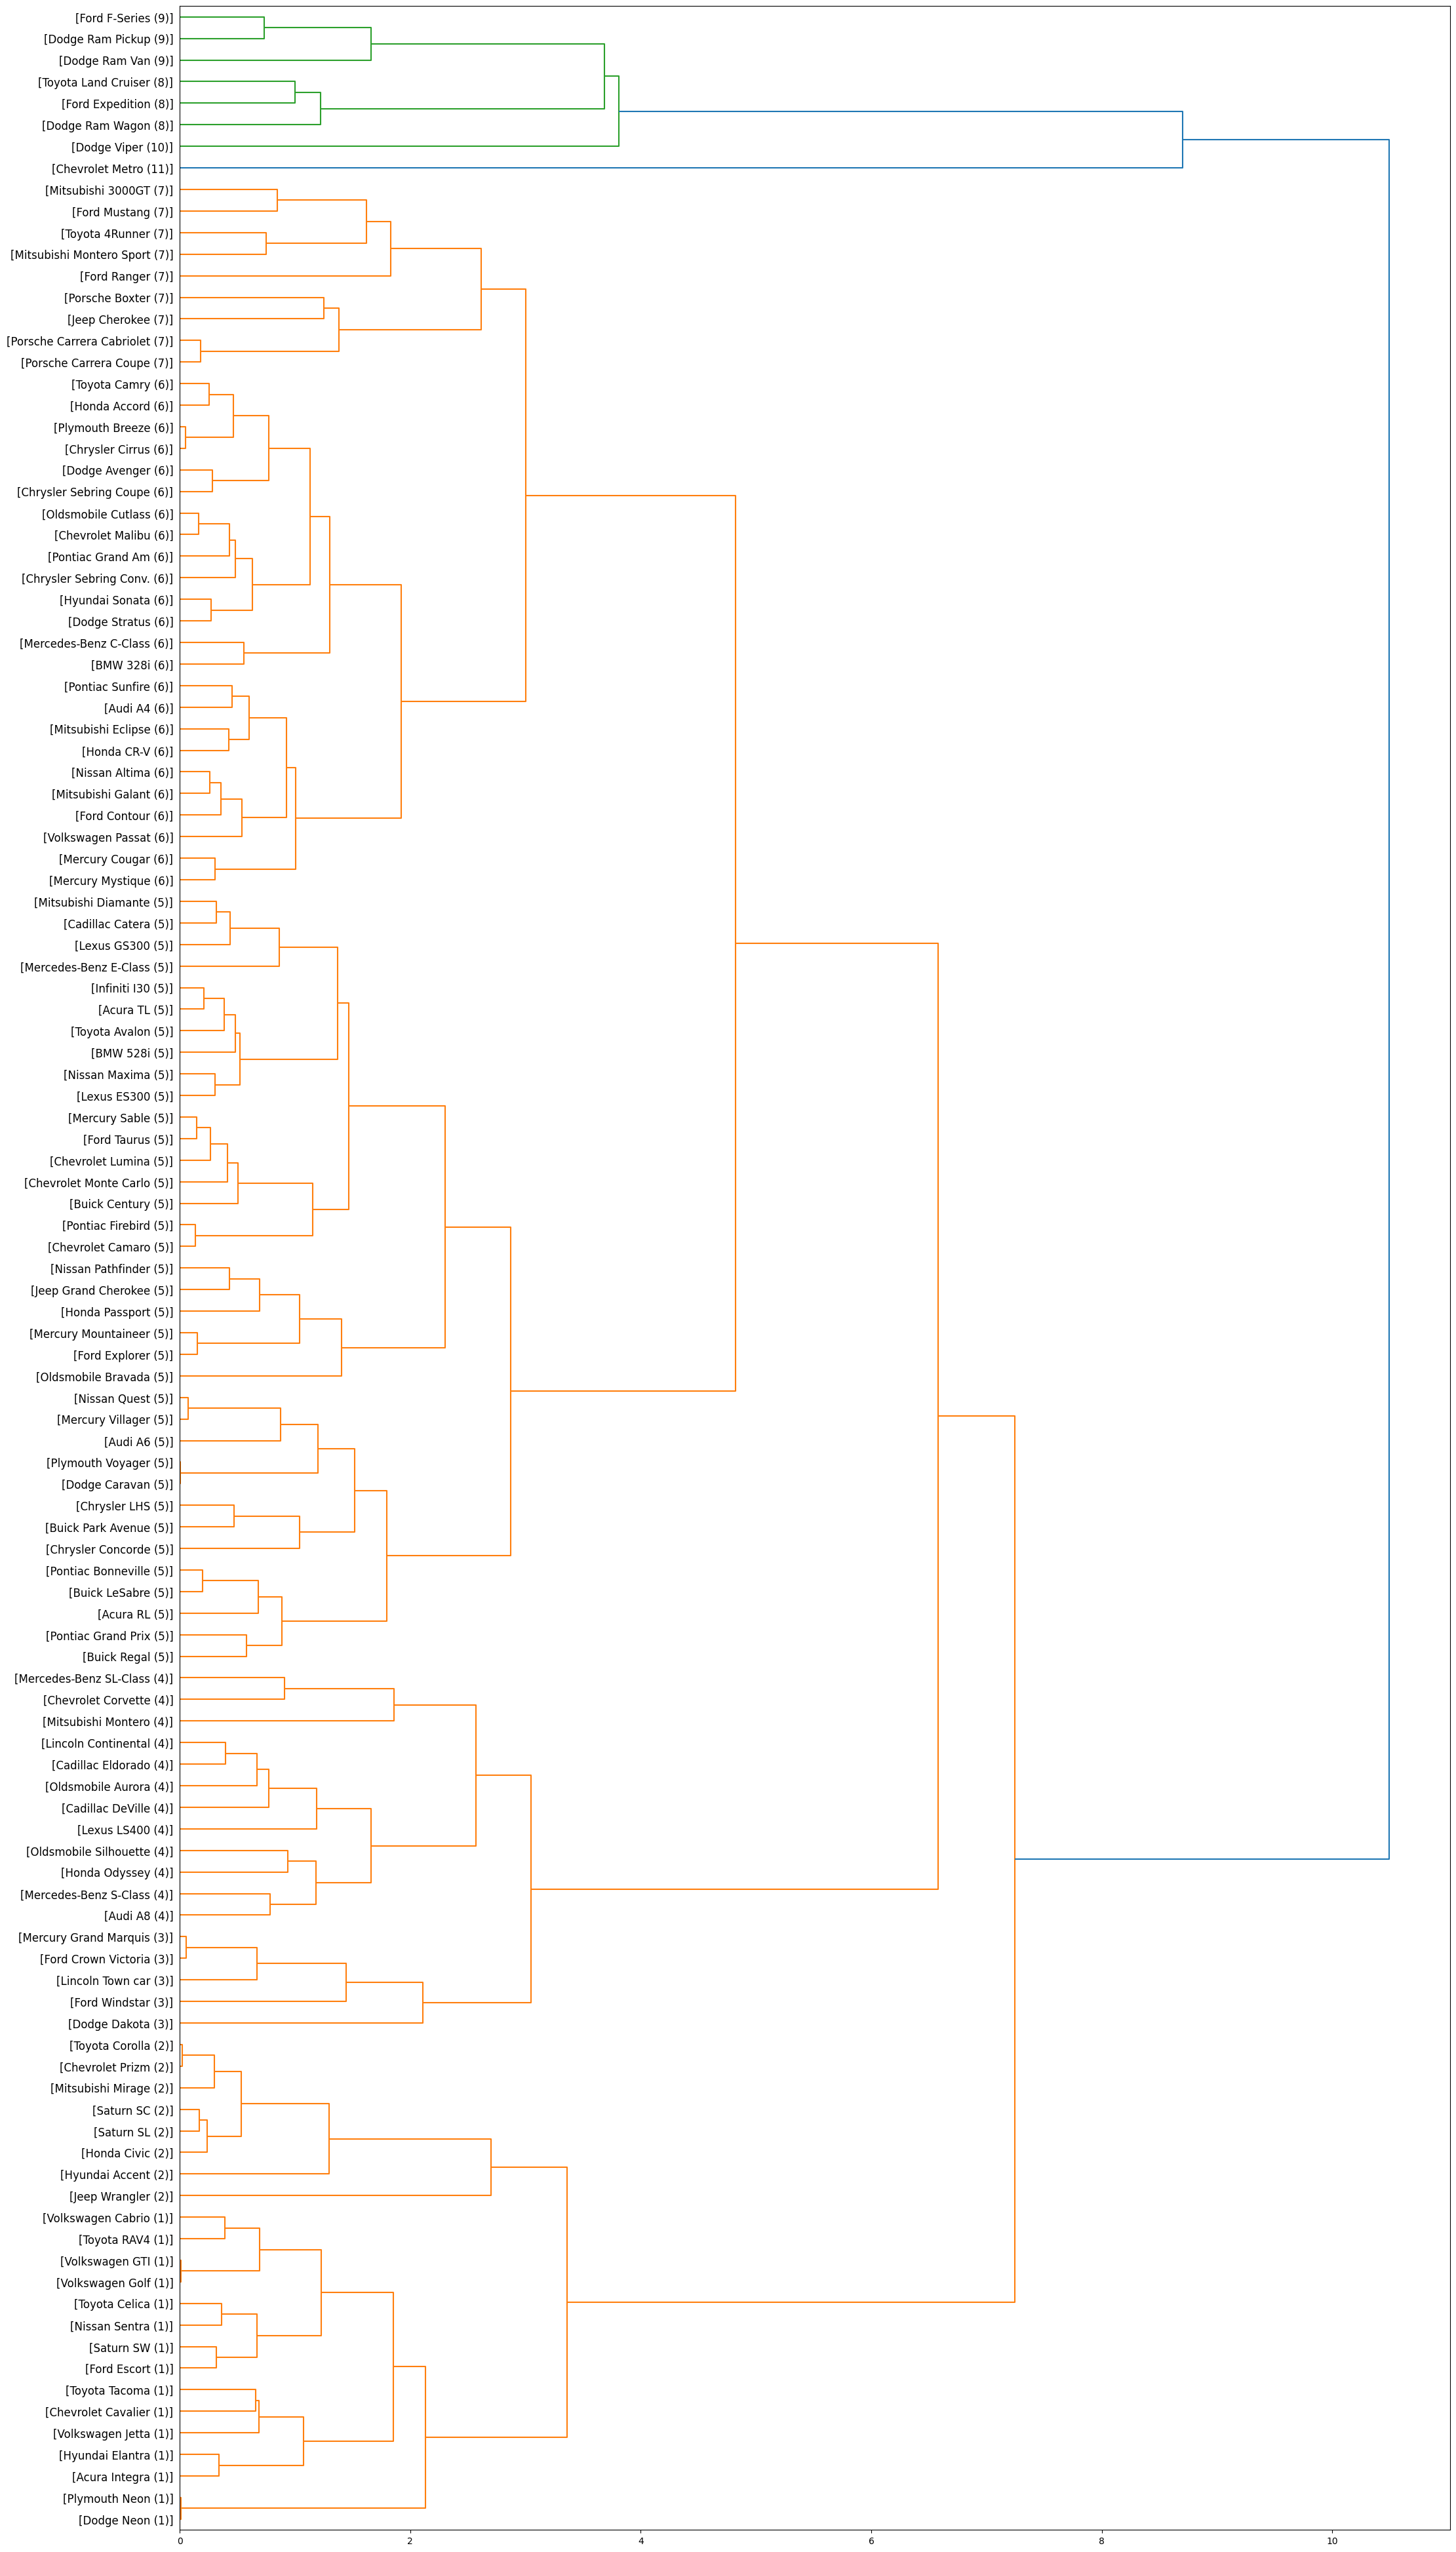

In [76]:
fig = plt.figure(figsize=(25, 50))
def llf(id):
    return f'[{df["manufact"][id]} {df["model"][id]} ({clusters[id]})]'

dendro = hierarchy.dendrogram(Z, leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [77]:
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

### scikit learn

In [86]:
from sklearn.metrics.pairwise import euclidean_distances

dist_matrix = euclidean_distances(matrix)
dist_matrix

array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]])

C:\Users\Diego\AppData\Local\Temp\ipykernel_2700\1215943380.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_dist = hierarchy.linkage(dist_matrix, 'complete')


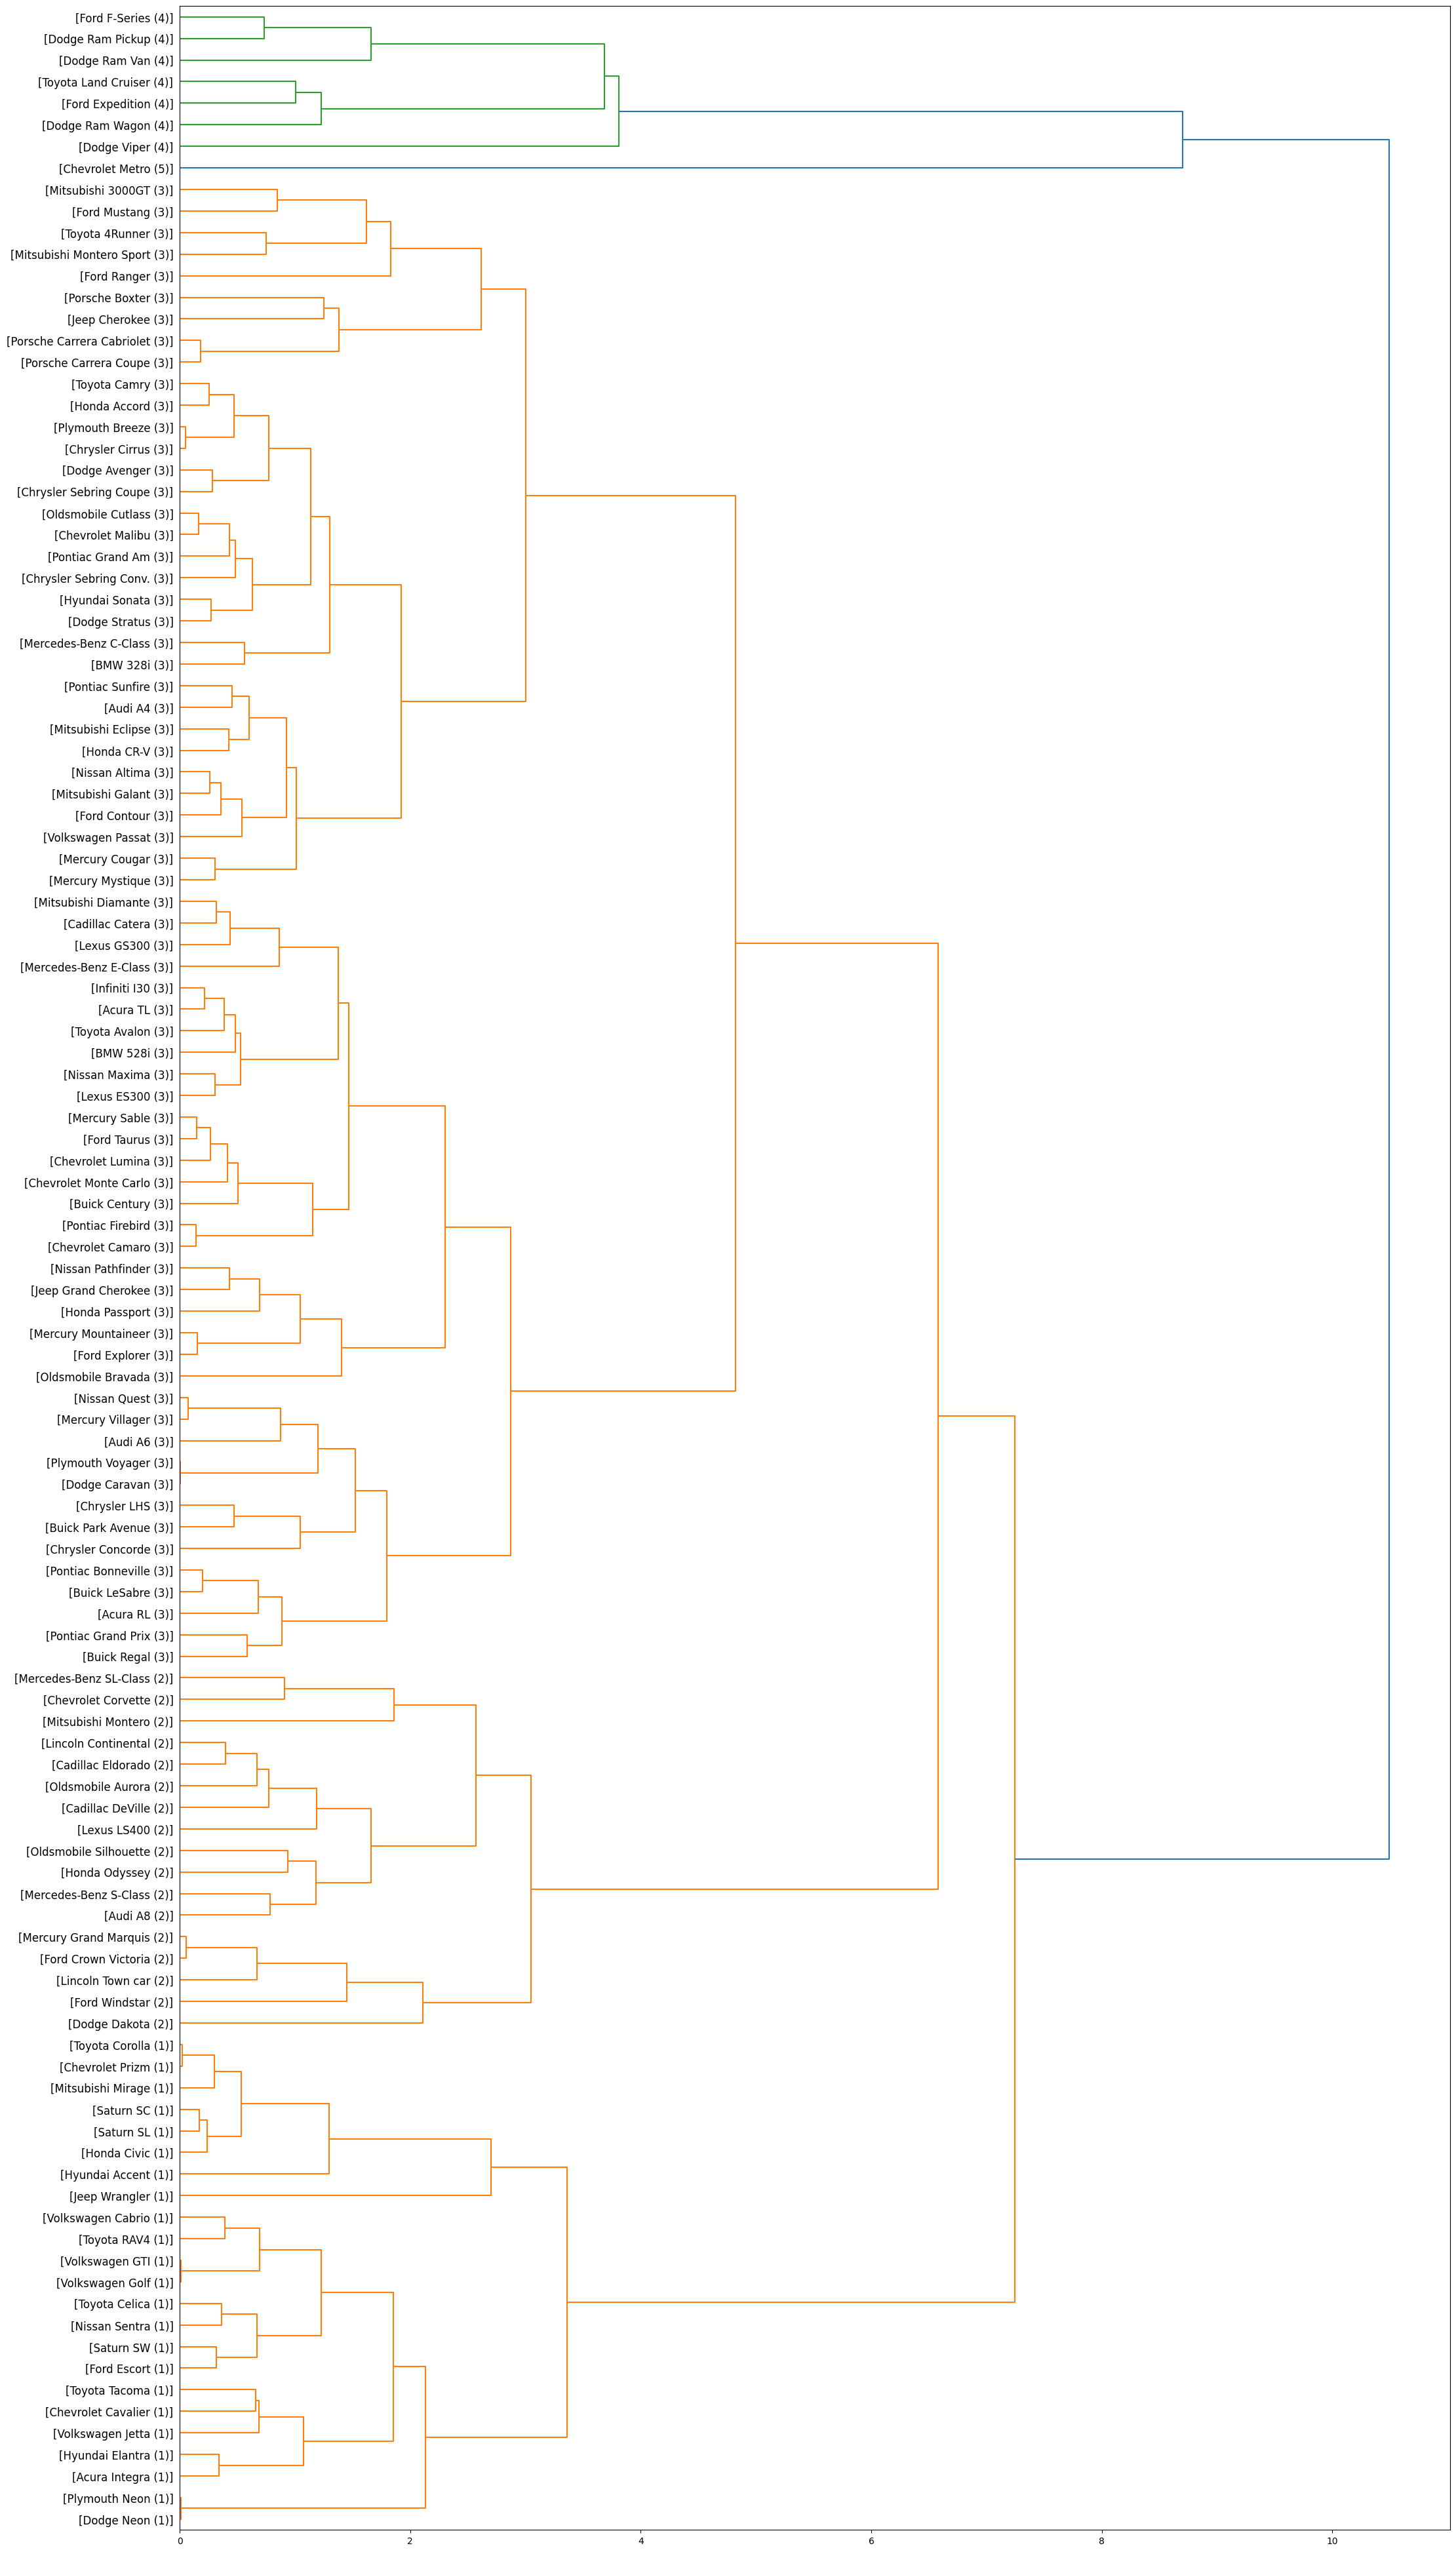

In [88]:
Z_dist = hierarchy.linkage(dist_matrix, 'complete')

fig = plt.figure(figsize=(25, 50))
dendro = hierarchy.dendrogram(Z_dist, leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [90]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

df['cluster_'] = agglom.labels_
agglom.labels_

c:\Users\Diego\code\ml\machinelearn\Lib\site-packages\sklearn\cluster\_agglomerative.py:544: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 2, 2, 3, 2, 4, 3, 2, 2, 2, 2, 2, 4, 4, 2, 1, 3, 2, 2, 2, 4, 1,
       5, 3, 3, 2, 3, 2, 1, 3, 3, 0, 0, 0, 0, 4, 2, 1, 3, 3, 2, 4, 2, 4,
       0, 3, 0, 1, 3, 3, 2, 4, 1, 1, 3, 2, 1, 3, 2, 2, 2, 4, 4, 4, 1, 3,
       3, 2, 3, 4, 3, 3, 3, 2, 4, 2, 2, 3, 2, 4, 4, 1, 3, 2, 2, 2, 3, 4,
       2, 4, 1, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1,
       3, 0, 1, 1, 3, 1, 1], dtype=int64)

C:\Users\Diego\AppData\Local\Temp\ipykernel_2700\3097670452.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

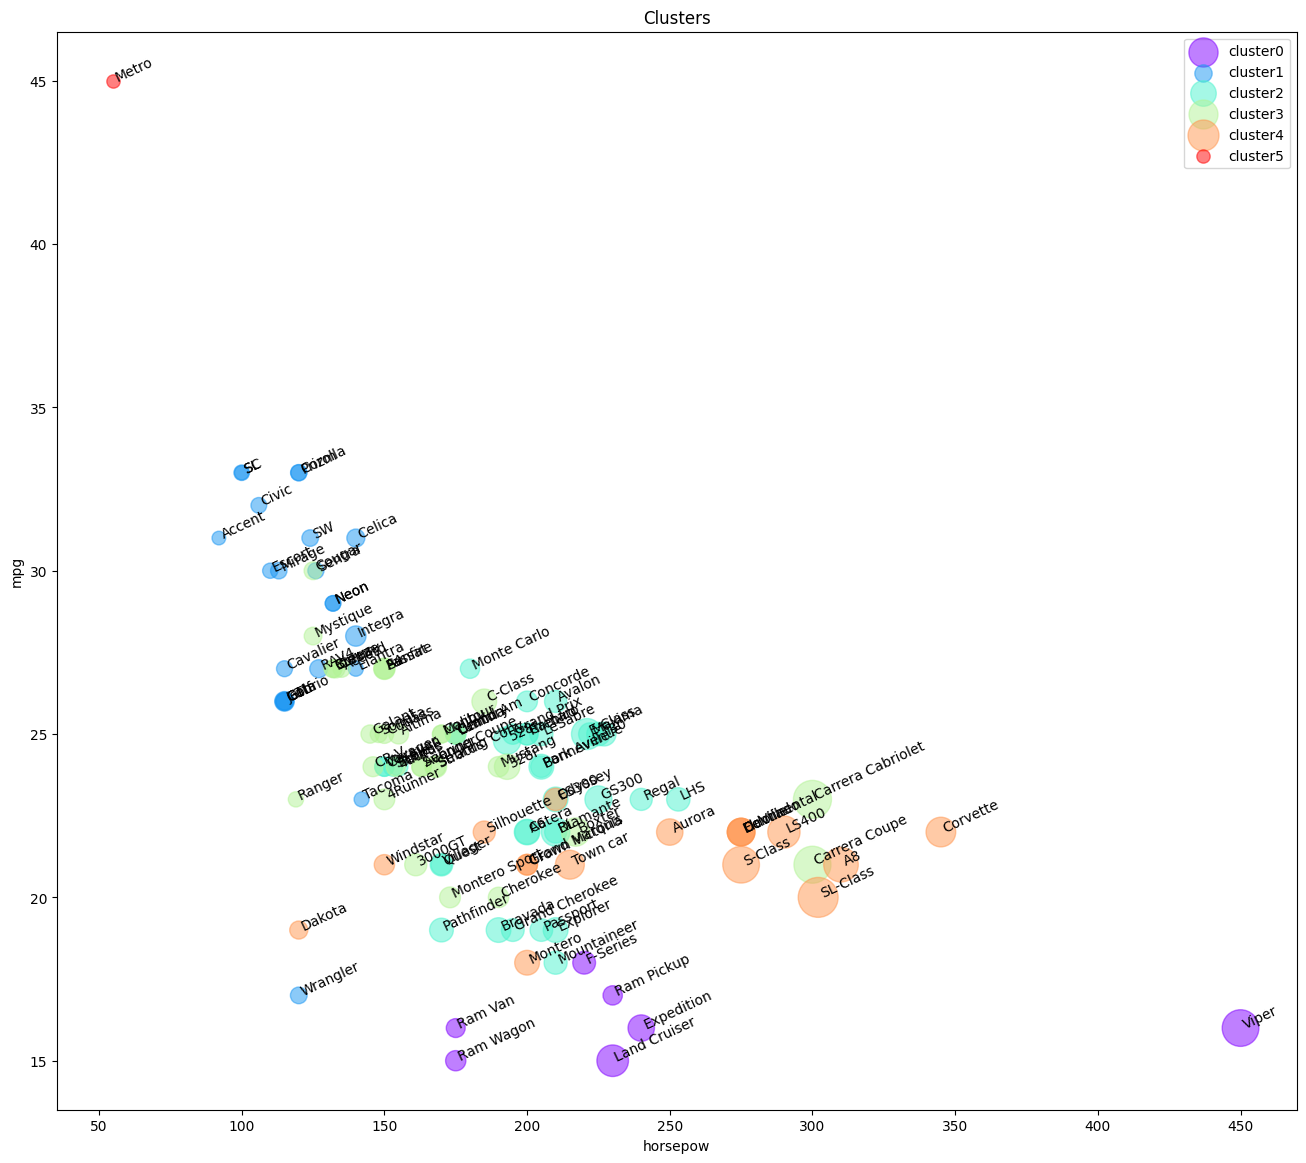

In [92]:
import matplotlib.cm as cm

n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
labels = list(range(0, n_clusters))

plt.figure(figsize=(16, 14))

for color, label in zip(colors, labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
        plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [93]:
df.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0.0      1
          1.0      6
1         0.0     20
          1.0      3
2         0.0     26
          1.0     10
3         0.0     28
          1.0      5
4         0.0     12
          1.0      5
5         0.0      1
Name: cluster_, dtype: int64

In [94]:
agg_cars = df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

C:\Users\Diego\AppData\Local\Temp\ipykernel_2700\2585305412.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   450.000000  8.000000  16.000000  69.725000
         1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   118.500000  1.890000  29.550000  14.226100
         1.0   129.666667  2.300000  22.333333  14.292000
2        0.0   203.615385  3.284615  24.223077  27.988692
         1.0   182.000000  3.420000  20.300000  26.120600
3        0.0   168.107143  2.557143  25.107143  24.693786
         1.0   155.600000  2.840000  22.000000  19.807000
4        0.0   267.666667  4.566667  21.416667  46.417417
         1.0   173.000000  3.180000  20.600000  24.308400
5        0.0    55.000000  1.000000  45.000000   9.235000

**Cars**:

*   Cluster 1: with almost high mpg, and low in horsepower.

*   Cluster 2: with good mpg and horsepower, but higher price than average.

*   Cluster 3: with low mpg, high horsepower, highest price.

**Trucks**:

*   Cluster 1: with almost highest mpg among trucks, and lowest in horsepower and price.

*   Cluster 2: with almost low mpg and medium horsepower, but higher price than average.

*   Cluster 3: with good mpg and horsepower, low price.


In [ ]:
plt.figure(figsize=(16, 10))
for color, label in zip(colors, labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i].mpg, 'type='str(int(i)) + ', price=' + str(int(subset.loc[i][3])) + 'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)